<a href="https://colab.research.google.com/github/AnanyaGodse/Machine-Learning-II-Deep-Learning-/blob/main/Experiment_7_Self_Organizing_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### **LAB 7 - Self Organizing Maps**

In [ ]:
!pip install minisom

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Credit_Card_Applications.csv')
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
df = df.drop(['CustomerID', 'Class'], axis=1)

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df.values)

In [ ]:
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, num_iteration=100)

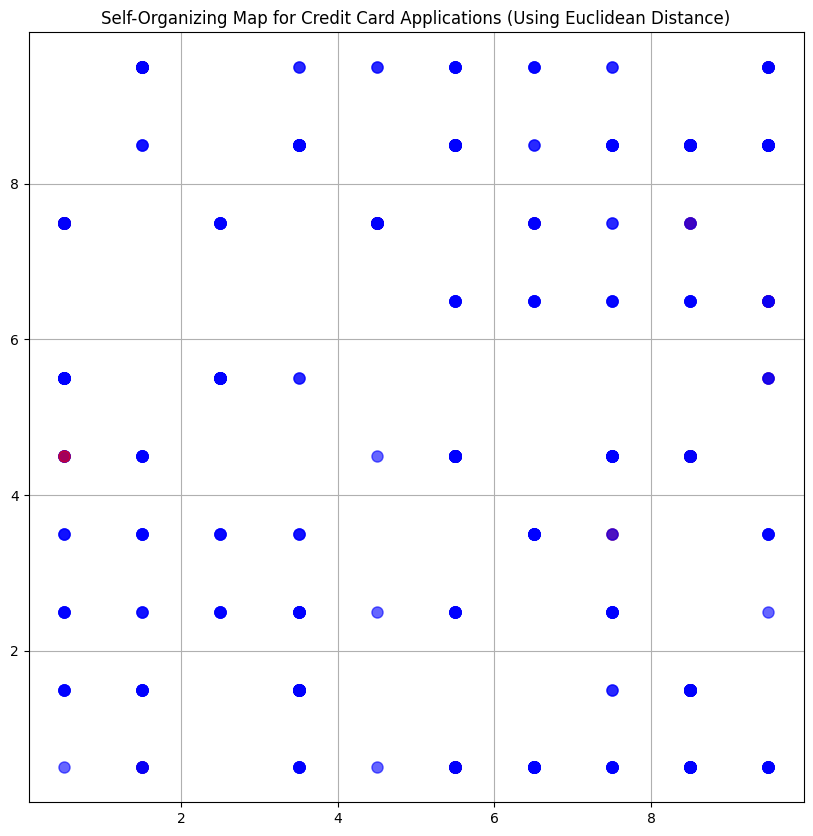

In [ ]:
distances = []
weights = som.get_weights()

plt.figure(figsize=(10, 10))

for i, x in enumerate(data):
    w = som.winner(x)
    distance = np.linalg.norm(x - weights[w[0], w[1]])
    distances.append(distance)

    if distance > 0.8:
        plt.plot(w[0] + 0.5, w[1] + 0.5, 'ro', markersize=8, alpha=0.6)  # Red for potential frauds
    else:
        plt.plot(w[0] + 0.5, w[1] + 0.5, 'bo', markersize=8, alpha=0.6)  # Blue for normal

plt.title('Self-Organizing Map for Credit Card Applications (Using Euclidean Distance)')
plt.grid()
plt.show()

In [ ]:
print("Max Euclidean Distance:", max(distances))
print("Min Euclidean Distance:", min(distances))

Max Euclidean Distance: 1.5336759097600579
Min Euclidean Distance: 0.00017254747893827343


#### **Applications of Self-Organizing Networks (SOMs)**
1. **Data Visualization:** SOMs are used to reduce the dimensionality of data, making it easier to visualize complex relationships in high-dimensional datasets.

2. **Anomaly Detection:** In fields like finance and cybersecurity, SOMs are used to identify unusual patterns or outliers that may indicate fraud or a security breach.

3. **Pattern Recognition:** SOMs are employed in areas such as speech recognition and image analysis.

4. **Customer Segmentation:** Businesses use SOMs to group customers based on behavior for targeted marketing.

5. **Feature Clustering:** SOMs can be used to cluster features in datasets, aiding in understanding data structure and relationships.

#### **Loss Function in SOMs**
The loss function in Self-Organizing Maps is usually quantization error, which measures the difference between input vectors and their corresponding best matching unit (BMU) on the map.

Minimizing this error helps improve the SOM's representation of the input space.

#### **Disadvantages of Kohonen Maps (SOMs)**

1. **Computational Complexity:** Training SOMs can be computationally expensive, especially for large datasets, as each input vector requires comparing with every neuron.

2. **Parameter Sensitivity:** The performance of SOMs depends heavily on hyperparameters like map size, learning rate, and neighborhood function, which require careful tuning.

3. **Curse of Dimensionality:** Although SOMs help in visualization, they may struggle with very high-dimensional data due to the curse of dimensionality.

4. **Fixed Grid Structure:** The rigid grid structure of SOMs may not always represent complex data distributions well.

5. **Difficulty in Interpretation:** While SOMs are useful for visualization, interpreting the results may not be straightforward, especially for non-technical stakeholders.